<a href="https://colab.research.google.com/github/WillianReinaG/pregunta-smart-icesi/blob/main/Copia_de_trabajofinalanadatos1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# TRABAJO FINAL CURSO DE ANALISIS DE DATOS 1
**TRABAJO FINAL**

ANALISIS COMPLETO DE UN DATASET

UNIVERSIDAD ICESI

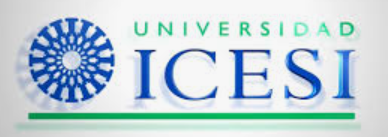



##INTRODUCCION

la pregunta smart del primer ejecicio de mi trabajo fue apliar la confiabilidad de los equipos portuario en la operacion en un 10% mas de lo actual que es 80%,
pero la falta de datos de la compañia y trasabilidad impide poder crear un dataset para este curso.
esta fue una de las razones por las que utilice dataset descargados de Kagge para continuar con los procesos educativos.
dataset relacionado con horas demanales estudio en alumnos, frente a estos se realizo identificacion de los datos correcion del tipo de datos e imputacion de datos faltares,
luego grafico de relacion y corelacion donde se agupando promedio de horas semanales de los alunmos y el grupo de horas mas bajas de estudio y con una covarancia de tendencia a cero segun graficos.

###INSTRUCCION 1

llamando las ibrearias

In [ ]:
#Importamos las librerias que usaremos en este practica

import pandas as pd
import numpy as np
import seaborn as sns

sns.set_theme(style="whitegrid")

###INSTRUCCION 2

lectura del archivo.csv en la ubicacion de reposo

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Pandas/student_performance_prediction.csv',    #Ruta completa a la ubicación del archivo de interés.
                 na_values='?')              #Como el archivo contiene algunos caracteres ?, con este comando pandas los interpreta como nan (not a number).

###INSTRUCCION 3

INFORMACION DEL DATASET
cantidad de filas y columnas,
tipo de datos, reision de datos nulos y composicion general

In [ ]:
df.shape

(40000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Student ID                                   40000 non-null  object 
 1   Study Hours per Week                         38005 non-null  float64
 2   Attendance Rate                              38008 non-null  float64
 3   Previous Grades                              38006 non-null  float64
 4   Participation in Extracurricular Activities  38000 non-null  object 
 5   Parent Education Level                       38000 non-null  object 
 6   Passed                                       38000 non-null  object 
dtypes: float64(3), object(4)
memory usage: 2.1+ MB


In [ ]:
df.head()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


In [ ]:
df.tail()

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
39995,S39996,15.6,93.8,51.4,Yes,Master,No
39996,S39997,11.3,66.4,64.2,No,Doctorate,Yes
39997,S39998,13.1,65.6,38.1,No,Bachelor,No
39998,S39999,14.1,74.9,NaN,Yes,Master,No
39999,S40000,11.8,55.1,68.5,No,Bachelor,Yes


In [ ]:
# datos nulos
df.isnull().sum()

,0
Student ID,0
Study Hours per Week,1995
Attendance Rate,1992
Previous Grades,1994
Participation in Extracurricular Activities,2000
Parent Education Level,2000
Passed,2000


###INSTRUCCION 4
reparacion de datos nullos
mputación univariante, o imputación de media
debido a la falta de datos uno de las imputaciones por un valor medio sesgado lo que reduce un poco la calida general del modelado.
se realiza imputacion por K-NN que nos permitira sustituir resultados faltantes teniendo en cuenta los valores de los vecinos con prediciones sobre los datos faltantes

In [ ]:
#Gracias a pandas tenemos un metodo que hace esto mucho más simple
#Le aplicamos a una columna del df  el metodo fillna
#En los parametros de fillna le damos la media de la columna y el inplace=true (el inplace true significa que va modificar el df)
df['Study Hours per Week'].fillna(df['Study Hours per Week'].mean(), inplace=True)
df['Attendance Rate'].fillna(df['Attendance Rate'].mean(), inplace=True)
#df['Previous Grades'].fillna(df['Previous Grades'].mean(), inplace=True)

In [ ]:
#Revision
df.isnull().sum()

,0
Student ID,0
Study Hours per Week,0
Attendance Rate,0
Previous Grades,1994
Participation in Extracurricular Activities,2000
Parent Education Level,2000
Passed,2000


In [ ]:
# KNNImputer
#En este caso usaremos un modelo de knn para darle un valor a nuestros valores nulos
from sklearn.impute import KNNImputer

# Construimos el modelo
imputer = KNNImputer(n_neighbors=5, weights="uniform")

# Entrenamos el modelo
imputer.fit(df[["Previous Grades"]])

#Reemplazamos los valores nulos
df["Previous Grades"] = imputer.transform(df[["Previous Grades"]]).ravel()

In [ ]:
# Revision
df.isnull().sum()

,0
Student ID,0
Study Hours per Week,0
Attendance Rate,0
Previous Grades,0
Participation in Extracurricular Activities,2000
Parent Education Level,2000
Passed,2000


In [ ]:
# prompt: reemplace NaN para datos tipo objecto

# Para reemplazar los valores nulos en columnas con datos tipo object
# usaremos la moda

for column in ["Participation in Extracurricular Activities", "Parent Education Level", "Passed"]:
  # Calculamos la moda
  mode = df[column].mode()[0]
  # Reemplazamos los valores nulos con la moda
  df[column].fillna(mode, inplace=True)

# Verificamos que no haya valores nulos
df.isnull().sum()

,0
Student ID,0
Study Hours per Week,0
Attendance Rate,0
Previous Grades,0
Participation in Extracurricular Activities,0
Parent Education Level,0
Passed,0
Study Hours per Week-discretos,0


###**INSTRUCCION** 5

Como podemos ver arriba, los tipo de datos son correcto.
Las variables numéricas son de tipo 'float64' ya que son numeros con decimales y las variables con cadenas de texto como categorías son de tipo 'object'
si fuera nesecario se utilizaria la formula acontinucion
df[["Nombre1", "Nombre2"]] = df[["Nombre1", "Nombre2"]].astype("float")
df[["Nombre3", "Nombre4"]] = df[["Nombre3", "Nombre4"]].astype("int")

In [ ]:
# Veamos los tipos de datos para cada columna:
df.dtypes

,0
Student ID,object
Study Hours per Week,int64
Attendance Rate,float64
Previous Grades,float64
Participation in Extracurricular Activities,object
Parent Education Level,object
Passed,object
Study Hours per Week-discretos,category


In [ ]:
#Normalización de los datos
# proceso de transformar valores de varias variables a un rango similar 0 a 1
# Reemplazar valor original por (valor original)/(valor máximo)
df['Attendance Rate'] = df['Attendance Rate']/df['Attendance Rate'].max()
df['Previous Grades'] = df['Previous Grades']/df['Previous Grades'].max()

# Ver las columnas escaladas
df[["Attendance Rate","Previous Grades"]].head()

,Attendance Rate,Previous Grades
0,0.501174,0.3750
1,0.634487,0.3030
2,0.501174,0.3200
3,0.511318,0.3120
4,0.594541,0.3635


In [ ]:
#discretizar valores
df["Study Hours per Week"]=df["Study Hours per Week"].astype("int", copy=True)

Text(0.5, 1.0, 'Study Hours per Week vs #alumnos')

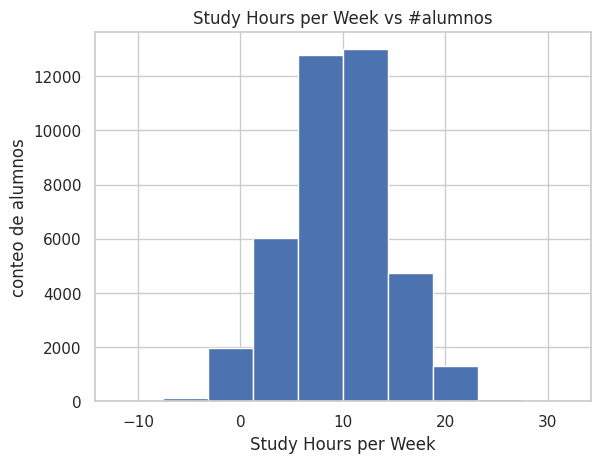

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Study Hours per Week"])

# Establecer las etiquetas x/y y el título del gráfico
plt.pyplot.xlabel("Study Hours per Week")
plt.pyplot.ylabel("conteo de alumnos")
plt.pyplot.title("Study Hours per Week vs #alumnos")

In [ ]:
bins = np.linspace(min(df["Study Hours per Week"]), max(df["Study Hours per Week"]), 4)
bins

array([-12.        ,   2.66666667,  17.33333333,  32.        ])

In [ ]:
group_names = ['Low', 'Medium', 'High']

In [ ]:
df['Study Hours per Week-discretos'] = pd.cut(df['Study Hours per Week'], bins, labels=group_names, include_lowest=True )
df[['Study Hours per Week','Study Hours per Week-discretos']].head(20)

,Study Hours per Week,Study Hours per Week-discretos
0,12,Medium
1,9,Medium
2,13,Medium
3,17,Medium
4,8,Medium
5,8,Medium
6,17,Medium
7,13,Medium
8,7,Medium
9,12,Medium


In [ ]:
df["Study Hours per Week"].value_counts()

,count
Study Hours per Week,
9,4955
10,3074
8,2875
11,2826
12,2690
7,2616
13,2369
6,2340
5,2078


Text(0.5, 1.0, 'Study Hours per Week (valores discretos) vs #alumnos')

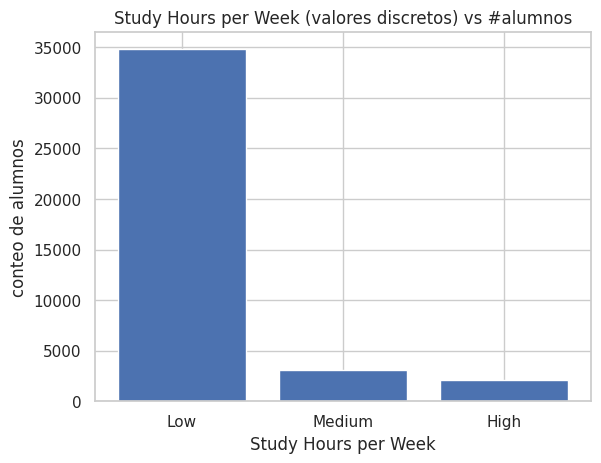

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["Study Hours per Week-discretos"].value_counts())

# Establecer las etiquetas x/y y el título del gráfico
plt.pyplot.xlabel("Study Hours per Week")
plt.pyplot.ylabel("conteo de alumnos")
plt.pyplot.title("Study Hours per Week (valores discretos) vs #alumnos")

### RESUMEN ESTADISTICO

In [ ]:
# Obtener el resumen estadístico de las columnas de tipo numérico
df.describe()

,Study Hours per Week,Attendance Rate,Previous Grades
count,40000.000000,40000.000000,40000.000000
mean,9.509600,0.501174,0.327201
std,4.863178,0.132351,0.080433
min,-12.000000,-0.095206,0.041500
25%,6.000000,0.415446,0.278500
50%,9.000000,0.501174,0.327201
75%,13.000000,0.585220,0.373000
max,32.000000,1.000000,1.000000


In [ ]:
# Obtener el resumen estadístico de las columnas 'longitud' y 'relacion-compresion'.
df [["Attendance Rate" , "Study Hours per Week"]].describe()

,Attendance Rate,Study Hours per Week
count,40000.000000,40000.000000
mean,0.501174,9.509600
std,0.132351,4.863178
min,-0.095206,-12.000000
25%,0.415446,6.000000
50%,0.501174,9.000000
75%,0.585220,13.000000
max,1.000000,32.000000


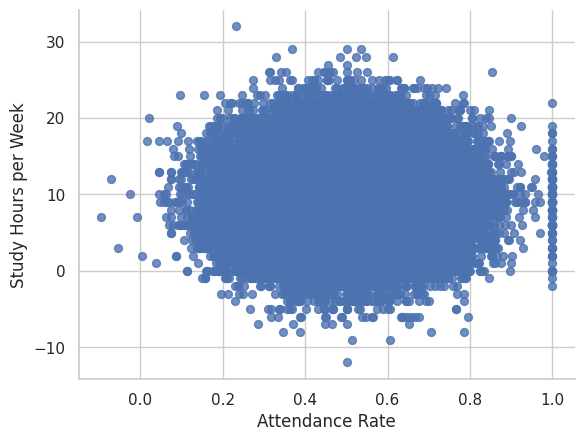

In [ ]:
import matplotlib.pyplot as plt
# Assuming 'df' is the DataFrame you want to plot, replace '_df_2' with 'df'
df.plot(kind='scatter', x='Attendance Rate', y='Study Hours per Week', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show() # Add this line to display the plot